In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [ ]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
print(df.info())
print("\nFirst few rows of the dataset:")
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None

First few rows of the dataset:
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  

In [ ]:
features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
target = 'medv'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)


feature_importance = pd.DataFrame({'feature': features, 'importance': abs(model.coef_)})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nFeature Importances:")
print(feature_importance)



Feature Importances:
    feature  importance
12    lstat    3.611658
5        rm    3.145240
7       dis    3.081908
8       rad    2.251407
10  ptratio    2.037752
4       nox    2.022319
9       tax    1.767014
11        b    1.129568
0      crim    1.002135
3      chas    0.718738
1        zn    0.696269
2     indus    0.278065
6       age    0.176048


In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")



Model Performance:
Mean Squared Error: 24.29
Root Mean Squared Error: 4.93
R-squared Score: 0.67


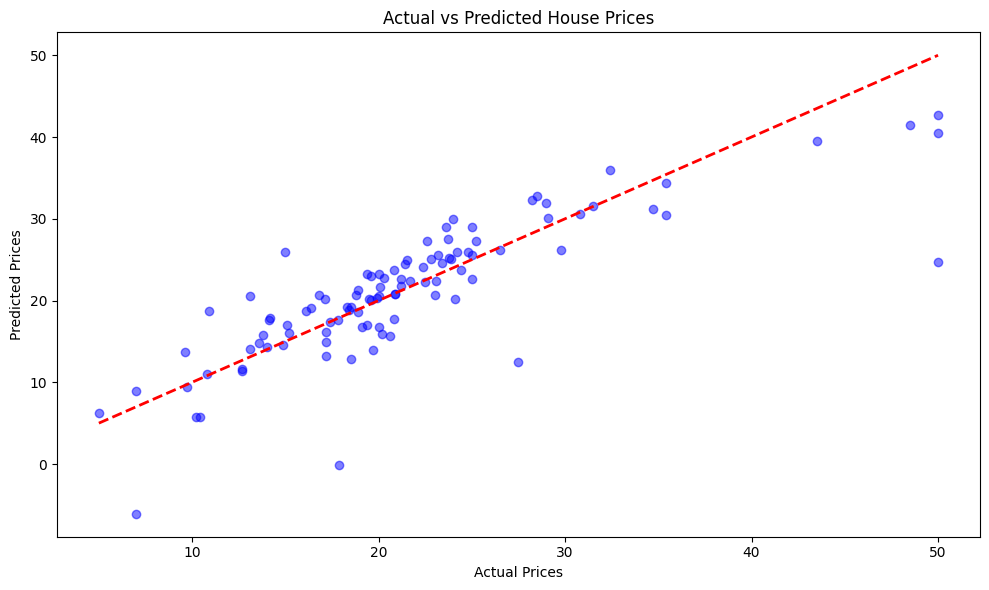

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.tight_layout()
plt.show()

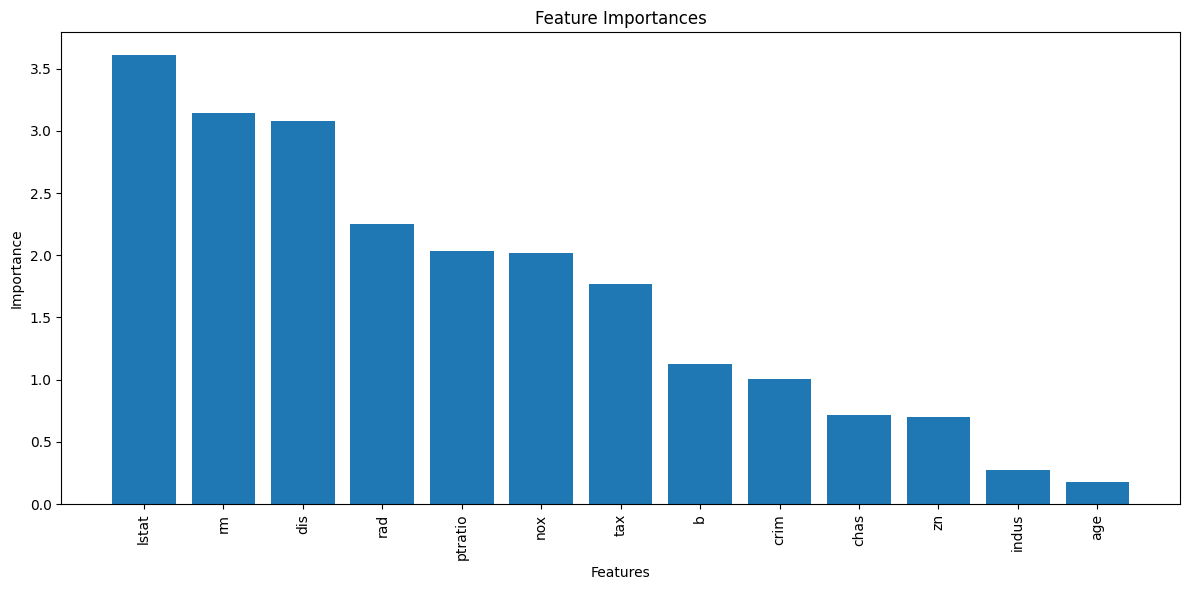

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

In [ ]:
def predict_house_price(features):
    features_scaled = scaler.transform([features])
    prediction = model.predict(features_scaled)
    return prediction[0]

new_house_features = [0.00632, 18.0, 2.31, 0, 0.538, 6.575, 65.2, 4.09, 1, 296, 15.3, 396.9, 4.98]
predicted_price = predict_house_price(new_house_features)
print(f"\nPredicted price for the new house: ${predicted_price:.2f}")


Predicted price for the new house: $29.95


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
